# Lab 6 - Data Visualization with Seaborn

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import numpy as np

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

In [16]:
week3 = pd.read_csv("nfloffenseweek3.csv")
week3.insert(2, "Week", True)
week3['Week'] = 3

week4 = pd.read_csv("nfloffenseweek4.csv")
week4.insert(2, "Week",True)
week4['Week'] = 4

week5 = pd.read_csv("nfloffenseweek5.csv")
week5.insert(2, "Week", True)
week5['Week'] = 5

week6 = pd.read_csv("nfloffenseweek6.csv")
week6.insert(2,"Week", True)
week6['Week'] = 6

week7 = pd.read_csv("nfloffenseweek6.csv")
week7.insert(2,"Week", True)
week7['Week'] = 7

teams = pd.read_csv("nfl_teams.csv")


frames = pd.concat([week3, week4, week5, week6, week7], axis= 0)
df = teams.merge(frames, left_on="Name", right_on="team", how= 'inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   number                      145 non-null    int64  
 1   Name                        145 non-null    object 
 2   Abbreviation                145 non-null    object 
 3   Conference                  145 non-null    object 
 4   Division                    145 non-null    object 
 5   rank                        145 non-null    int64  
 6   team                        145 non-null    object 
 7   Week                        145 non-null    int64  
 8   games                       145 non-null    int64  
 9   points_scored               145 non-null    int64  
 10  total_yards                 145 non-null    int64  
 11  offensive_plays             145 non-null    int64  
 12  yards_per_play              145 non-null    float64
 13  turnovers_lost              145 non

2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

Text(0.5, 1.0, 'Average Points Scored')

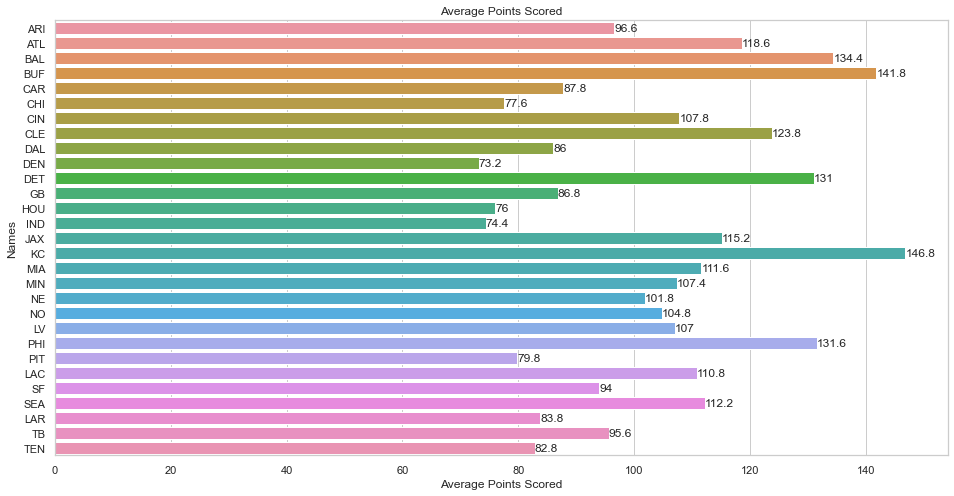

In [34]:
plt.figure(figsize = (16,8))
ax = sns.barplot(x='points_scored', y='Abbreviation', data=df, orient='h', ci=None)
ax.bar_label(ax.containers[0])
plt.ylabel("Names")
plt.xlabel("Average Points Scored")
plt.title("Average Points Scored")

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

Text(0.5, 1.0, 'Average Passing and Rushing Yards')

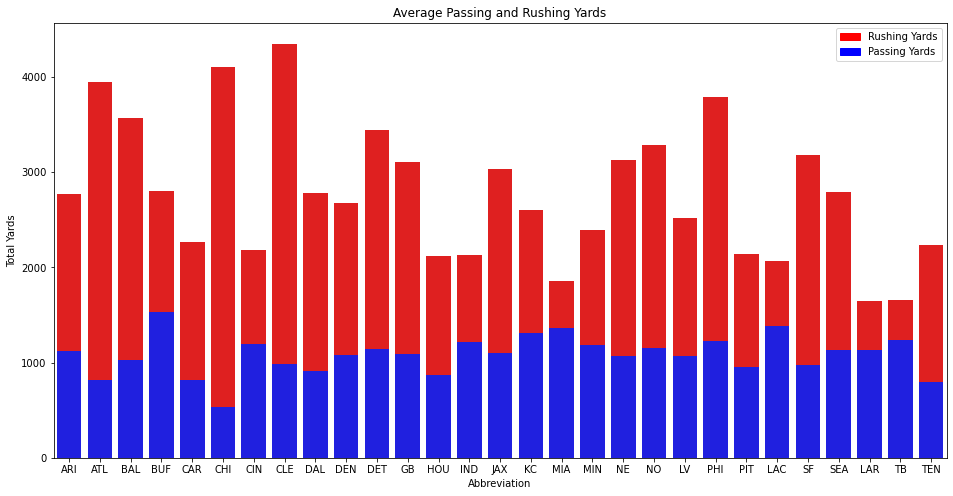

In [17]:
plt.figure(figsize = (16,8))
sns.barplot( data=df, x=df.Abbreviation, y= df.rushing_yards, ci=False, estimator=np.sum, color="red")
sns.barplot( data=df, x=df.Abbreviation, y= df.passing_yards, ci=False, color="blue")
top=mp.Patch(color="red", label="Rushing Yards")
bottom=mp.Patch(color="blue", label="Passing Yards")
plt.legend(handles=[top,bottom])
plt.ylabel("Total Yards")
plt.title("Average Passing and Rushing Yards")


4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

Text(0.5, 1.0, 'Total Yards VS First Downs')

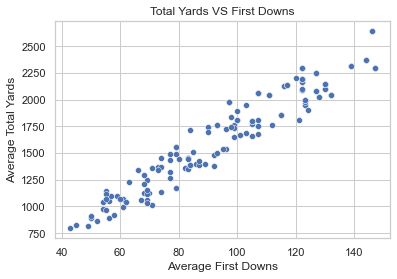

In [37]:
sns.scatterplot(data=df, x="1st_downs", y="total_yards")
plt.ylabel("Average Total Yards")
plt.xlabel("Average First Downs")
plt.title("Total Yards VS First Downs")

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

Text(0.5, 1.0, 'Penalty Yards by Week for the Baltimore Ravens and LA Rams')

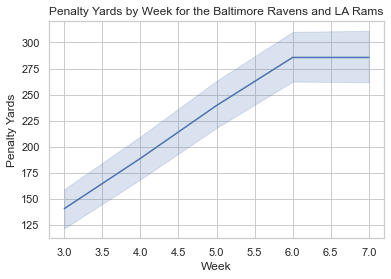

In [55]:
Balt_LA = df[(df.team == "Baltimore Ravens") | (df.Name == "Los Angeles Rams")]

sns.lineplot(data=df, x="Week", y="penalty_yards")

plt.ylabel("Penalty Yards")
plt.title("Penalty Yards by Week for the Baltimore Ravens and LA Rams")

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

Text(0.5, 1.0, 'Total Points VS Yards Per Play')

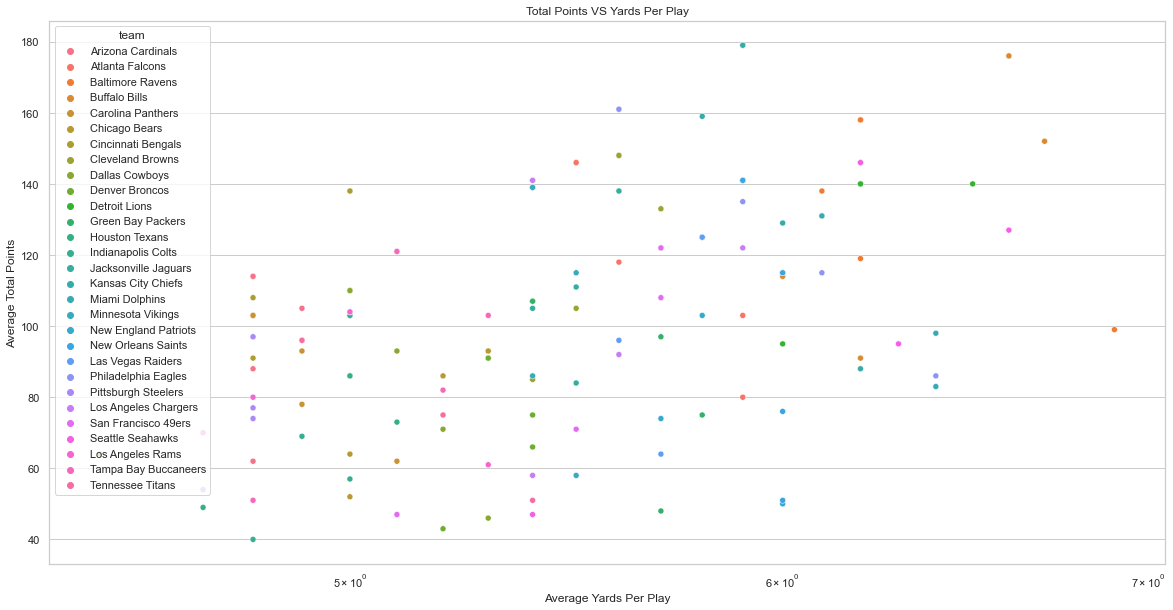

In [51]:
plt.figure(figsize = (20,10))

g = sns.scatterplot(data=df, x="yards_per_play", y="points_scored", hue="team")
g.set(xscale="log")
plt.ylabel("Average Total Points")
plt.xlabel("Average Yards Per Play")
plt.title("Total Points VS Yards Per Play")

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

Text(0.5, 1.0, 'The Number of Penalty Yards for Each Team in the NFC West for Each Week')

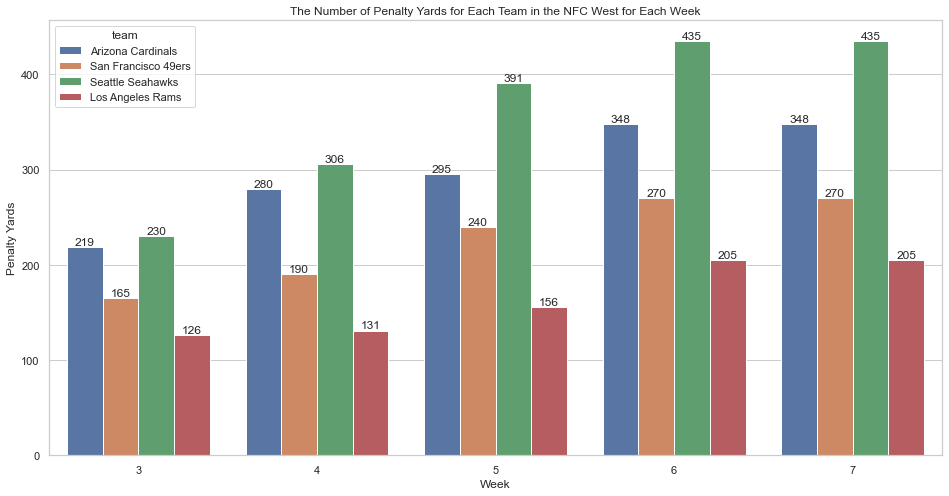

In [70]:
plt.figure(figsize = (16,8))

west = df[(df.Conference == "NFC") & (df.Division == "West")]
cd = sns.barplot(x='Week', y='penalty_yards', data=west, ci=None, hue="team")
cd.bar_label(cd.containers[0])
cd.bar_label(cd.containers[1])
cd.bar_label(cd.containers[2])
cd.bar_label(cd.containers[3])

plt.ylabel("Penalty Yards")
plt.xlabel("Week")
plt.title("The Number of Penalty Yards for Each Team in the NFC West for Each Week")


8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

Text(0.5, 1.0, 'Average Number of Weekly Points')

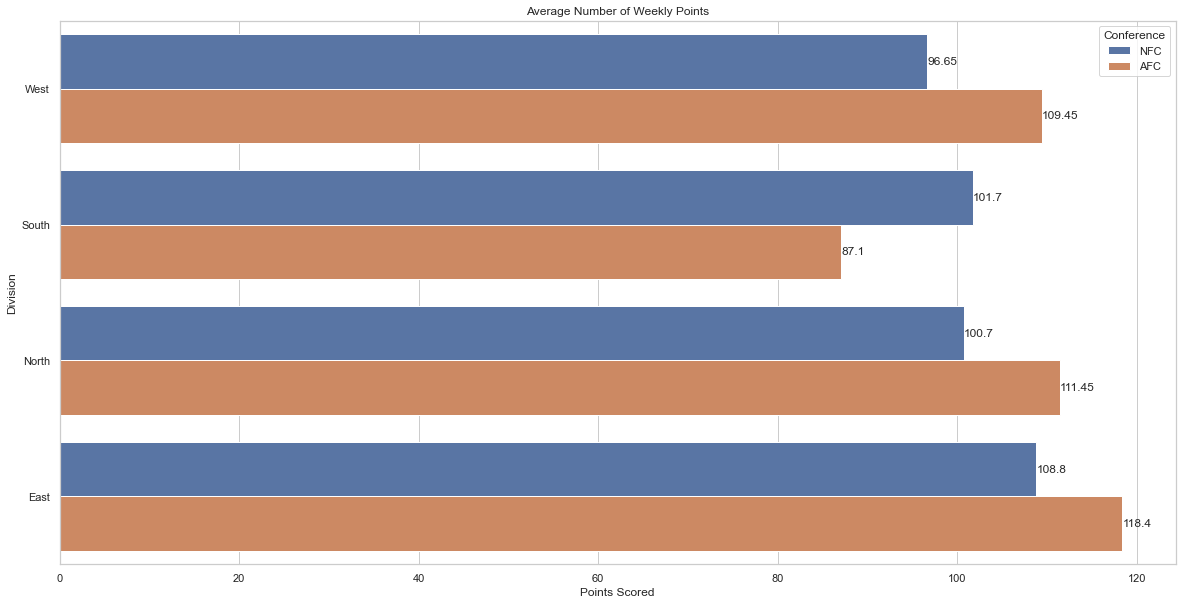

In [77]:

plt.figure(figsize = (20,10))
wp = sns.barplot(x='points_scored', y='Division', data=df, orient='h', ci=None, hue="Conference")
wp.bar_label(wp.containers[0])
wp.bar_label(wp.containers[1])

plt.ylabel("Division")
plt.xlabel("Points Scored")
plt.title("Average Number of Weekly Points")